[![Colab][open-in-colab]][link]

[open-in-colab]: https://img.shields.io/badge/open%20in%20Colab-F9AB00?style=for-the-badge&logo=googlecolab&color=525252
[link]: https://drive.google.com/file/d/1i0mPGhynKCTRuMv4AbZUcDeQK3b8ZJSE/view

# Import libraries

In [52]:
import pandas as pd

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import classification_report, f1_score, precision_score, recall_score, accuracy_score, make_scorer

from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from category_encoders import CountEncoder, HelmertEncoder, OneHotEncoder, BinaryEncoder
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.decomposition import PCA

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, StackingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb

import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

# Import dataset

In [3]:
flags = pd.read_csv("flag.csv", names=['name', 'landmass', 'zone', 'area', 'population', 'language', 'religion', 
                                'bars', 'stripes', 'colours', 'red', 'green', 'blue', 'gold', 'white', 
                                'black', 'orange', 'mainhue', 'circles', 'crosses', 'saltires', 'quarters', 
                                'sunstars', 'crescent', 'triangle', 'icon', 'animate', 'text', 'topleft', 'botright'])
flags

,name,landmass,zone,area,population,language,religion,bars,stripes,colours,...,saltires,quarters,sunstars,crescent,triangle,icon,animate,text,topleft,botright
0,Afghanistan,5,1,648,16,10,2,0,3,5,...,0,0,1,0,0,1,0,0,black,green
1,Albania,3,1,29,3,6,6,0,0,3,...,0,0,1,0,0,0,1,0,red,red
2,Algeria,4,1,2388,20,8,2,2,0,3,...,0,0,1,1,0,0,0,0,green,white
3,American-Samoa,6,3,0,0,1,1,0,0,5,...,0,0,0,0,1,1,1,0,blue,red
4,Andorra,3,1,0,0,6,0,3,0,3,...,0,0,0,0,0,0,0,0,blue,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189,Western-Samoa,6,3,3,0,1,1,0,0,3,...,0,1,5,0,0,0,0,0,blue,red
190,Yugoslavia,3,1,256,22,6,6,0,3,4,...,0,0,1,0,0,0,0,0,blue,red
191,Zaire,4,2,905,28,10,5,0,0,4,...,0,0,0,0,0,1,1,0,green,green
192,Zambia,4,2,753,6,10,5,3,0,4,...,0,0,0,0,0,0,1,0,green,brown


# Data splitting
Let's challenge and try to make a classification based on descriptions and characteristics of flags only, without considering geographical information, area and population

In [4]:
X = flags.iloc[:,7:]
y = flags.iloc[:,6]

Divide all features into numerical and categorical features according to their description

In [5]:
cat = ['red', 'green', 'blue', 'gold', 'white', 'black', 'orange', 'mainhue', 
       'crescent', 'triangle', 'icon', 'animate', 'text', 'topleft', 'botright']
num = ['bars', 'stripes', 'colours','circles', 'crosses', 'saltires', 'quarters', 'sunstars']
X[num].describe()

,bars,stripes,colours,circles,crosses,saltires,quarters,sunstars
count,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000
mean,0.453608,1.551546,3.463918,0.170103,0.149485,0.092784,0.149485,1.386598
std,1.038339,2.328005,1.300154,0.463075,0.385387,0.290879,0.435860,4.396186
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,3.000000,4.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,5.000000,14.000000,8.000000,4.000000,2.000000,1.000000,4.000000,50.000000


There are no obvious outliers or omissions

In [6]:
y.value_counts()

1    60
0    40
2    36
5    27
6    15
3     8
4     4
7     4
Name: religion, dtype: int64

Our target classes are not balanced, so we use stratification splitting

# Baseline - Logistic Regression
Our baseline will be Logistic Regression based on raw data and we just encode category features usind one-hot-encoder

In [7]:
X_train, X_test, y_train, y_test = train_test_split(pd.get_dummies(X, columns=['mainhue', 'topleft', 'botright'], 
                                                                   drop_first=True), 
                                                    y, test_size=0.2, stratify=y, random_state=42)
lr = LogisticRegression()
sc = StandardScaler()
sc.fit_transform(X_train)
lr.fit(X_train, y_train)
print(f"""{lr} accuracy: {round(lr.score(X_test, y_test), 3)}
{classification_report(y_test, lr.predict(sc.transform(X_test)))}""")

LogisticRegression() accuracy: 0.41
              precision    recall  f1-score   support

           0       0.50      0.25      0.33         8
           1       1.00      0.33      0.50        12
           2       0.42      0.71      0.53         7
           3       0.14      0.50      0.22         2
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         5
           6       0.25      0.33      0.29         3
           7       0.00      0.00      0.00         1

    accuracy                           0.33        39
   macro avg       0.29      0.27      0.23        39
weighted avg       0.51      0.33      0.35        39



We get a bad implementation, but of course we can get better score)

# Analysis of numeric features 
Let's look at the distributions of numerical features and try to transform them to make them more model-friendly

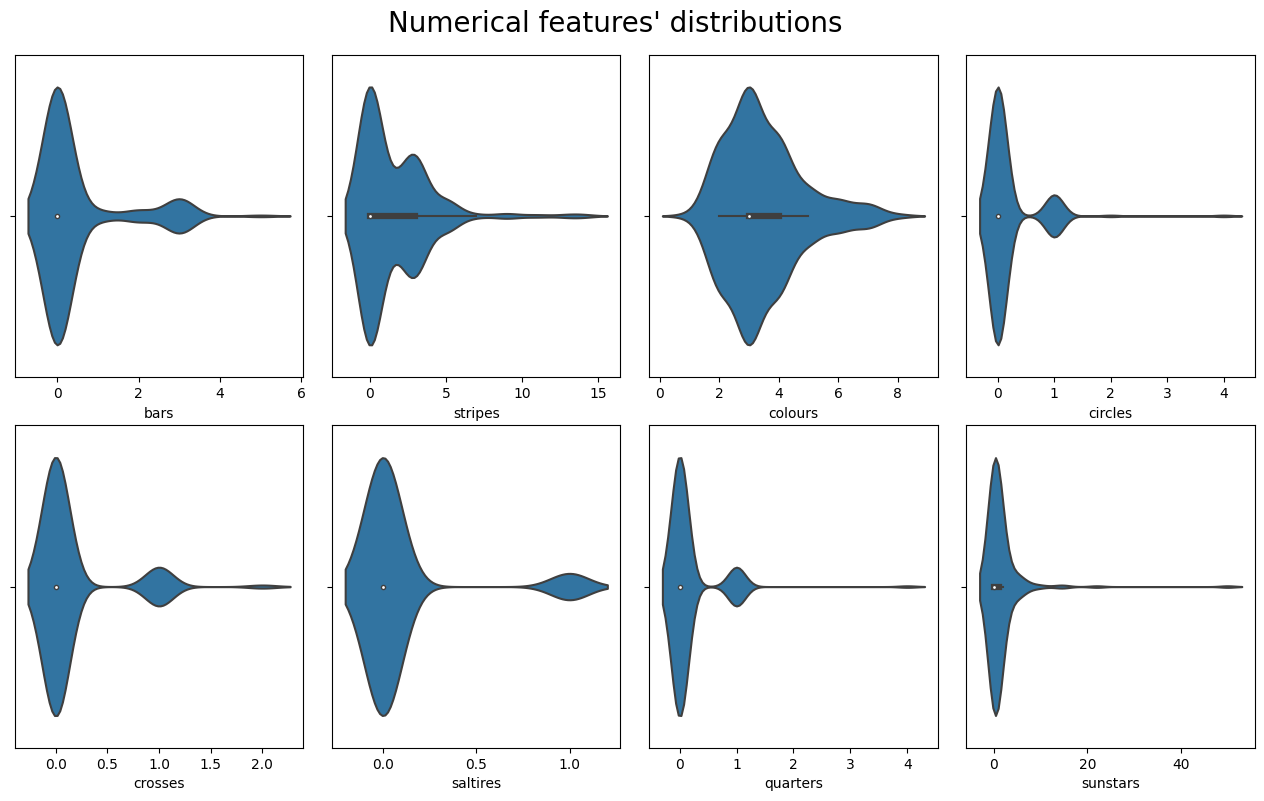

In [8]:
fig, axs = plt.subplots(2,4, figsize=(16,9))
plt.suptitle("Numerical features' distributions", size=20, y=0.93)
plt.subplots_adjust(wspace=0.1, hspace=0.15)
sns.violinplot(X.bars, ax=axs[0,0])
sns.violinplot(X.stripes, ax=axs[0,1])
sns.violinplot(X.colours, ax=axs[0,2])
sns.violinplot(X.circles, ax=axs[0,3])
sns.violinplot(X.crosses, ax=axs[1,0])
sns.violinplot(X.saltires, ax=axs[1,1])
sns.violinplot(X.quarters, ax=axs[1,2])
sns.violinplot(X.sunstars, ax=axs[1,3])
plt.show()

As you can see, all of our attributes have a number and in most attributes the overwhelming number of values is 0 and 1. Given the prevailing number of categorical features, let's try another type of model, let it be an ensemble - RandomForestClassifier.

# RandomForestClassifier

In [9]:
X_train, X_test, y_train, y_test = train_test_split(pd.get_dummies(X, columns=['mainhue', 'topleft', 'botright'], 
                                                                   drop_first=True), 
                                                    y, test_size=0.2, stratify=y, random_state=42)
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
print(f"""{rf} accuracy: {round(rf.score(X_test, y_test), 3)}
{classification_report(y_test, rf.predict(X_test))}""")

RandomForestClassifier() accuracy: 0.513
              precision    recall  f1-score   support

           0       0.46      0.75      0.57         8
           1       0.62      0.67      0.64        12
           2       1.00      0.29      0.44         7
           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00         1
           5       0.33      0.60      0.43         5
           6       0.50      0.33      0.40         3
           7       0.00      0.00      0.00         1

    accuracy                           0.51        39
   macro avg       0.36      0.33      0.31        39
weighted avg       0.54      0.51      0.48        39



Already better, the quality metrics have picked up a bit. Let's try to work on the features.

# Feature Engineering
Look at the correlation matrix and determine which attributes are likely to be highly mutually correlated and negatively affect the model.

In [10]:
corr = X.corr()
corr.style.background_gradient(cmap='coolwarm', low=0.5, high=0)

,bars,stripes,colours,red,green,blue,gold,white,black,orange,circles,crosses,saltires,quarters,sunstars,crescent,triangle,icon,animate,text
bars,1.000000,-0.273371,-0.064574,-0.017093,0.116905,-0.128510,0.037118,-0.198697,-0.029076,0.046841,-0.096650,-0.144432,-0.140070,-0.150604,-0.114667,0.021743,-0.132973,-0.002598,0.016260,0.067709
stripes,-0.273371,1.000000,0.038278,0.014210,-0.085367,0.126104,-0.031987,0.125907,0.091814,-0.106477,-0.087479,-0.190550,-0.190735,0.091941,0.215486,-0.010242,-0.005719,-0.107426,-0.157922,-0.111564
colours,-0.064574,0.038278,1.000000,0.311759,0.428388,0.294779,0.500073,0.214334,0.375794,0.477655,0.178062,0.253827,0.378810,0.187861,0.031008,-0.173644,0.143252,0.505614,0.544576,0.398483
red,-0.017093,0.014210,0.311759,1.000000,0.031169,-0.204010,0.081769,-0.033483,0.142230,-0.055783,0.108639,0.102772,0.122031,0.119914,0.019726,-0.091458,0.025760,0.097513,0.133648,0.017507
green,0.116905,-0.085367,0.428388,0.031169,1.000000,-0.298328,0.192788,-0.131282,0.107461,0.236617,0.011643,-0.043077,0.126624,-0.085607,-0.068738,-0.007137,0.039840,0.190550,0.250157,0.243872
blue,-0.128510,0.126104,0.294779,-0.204010,-0.298328,1.000000,0.032272,0.298577,-0.245276,0.082690,0.048217,0.273647,0.242192,0.289396,0.156916,-0.116522,0.006603,0.118539,0.028249,0.106271
gold,0.037118,-0.031987,0.500073,0.081769,0.192788,0.032272,1.000000,-0.442460,0.247378,0.085019,0.011643,0.010665,0.126624,0.009430,-0.019270,-0.096461,0.159207,0.380732,0.353249,0.243872
white,-0.198697,0.125907,0.214334,-0.033483,-0.131282,0.298577,-0.442460,1.000000,-0.138457,0.085311,0.081854,0.191904,0.142195,0.197159,0.099590,0.037274,-0.011029,0.058387,0.049165,0.128483
black,-0.029076,0.091814,0.375794,0.142230,0.107461,-0.245276,0.247378,-0.138457,1.000000,-0.033103,0.079483,-0.114232,-0.073192,-0.154542,-0.069278,-0.148364,0.328242,0.130330,0.161053,0.030093
orange,0.046841,-0.106477,0.477655,-0.055783,0.236617,0.082690,0.085019,0.085311,-0.033103,1.000000,0.182707,0.161914,0.239252,0.073556,-0.069191,-0.031026,-0.114468,0.293670,0.482238,0.212075


Let's identify features wuth strong correlation:
- crosses - saltires: >0.7
- colours - gold: >0.5
- colours - icon: >0.5
- colours - animate: >0.5

We have lot's of features with moderate correlation, thats why we stop in strong correlation. Let's take a closer look at the correlating attributes, as in a multi-class classification they can provide important information about a particular class. Consider the pairplots for each combination of correlated features separately.

|1st group|2nd group|3rd group|
|-----|-----|-----|
colours |crosses |icon
green |saltires|animate
gold |quarters|text
white
orange
icon
animate

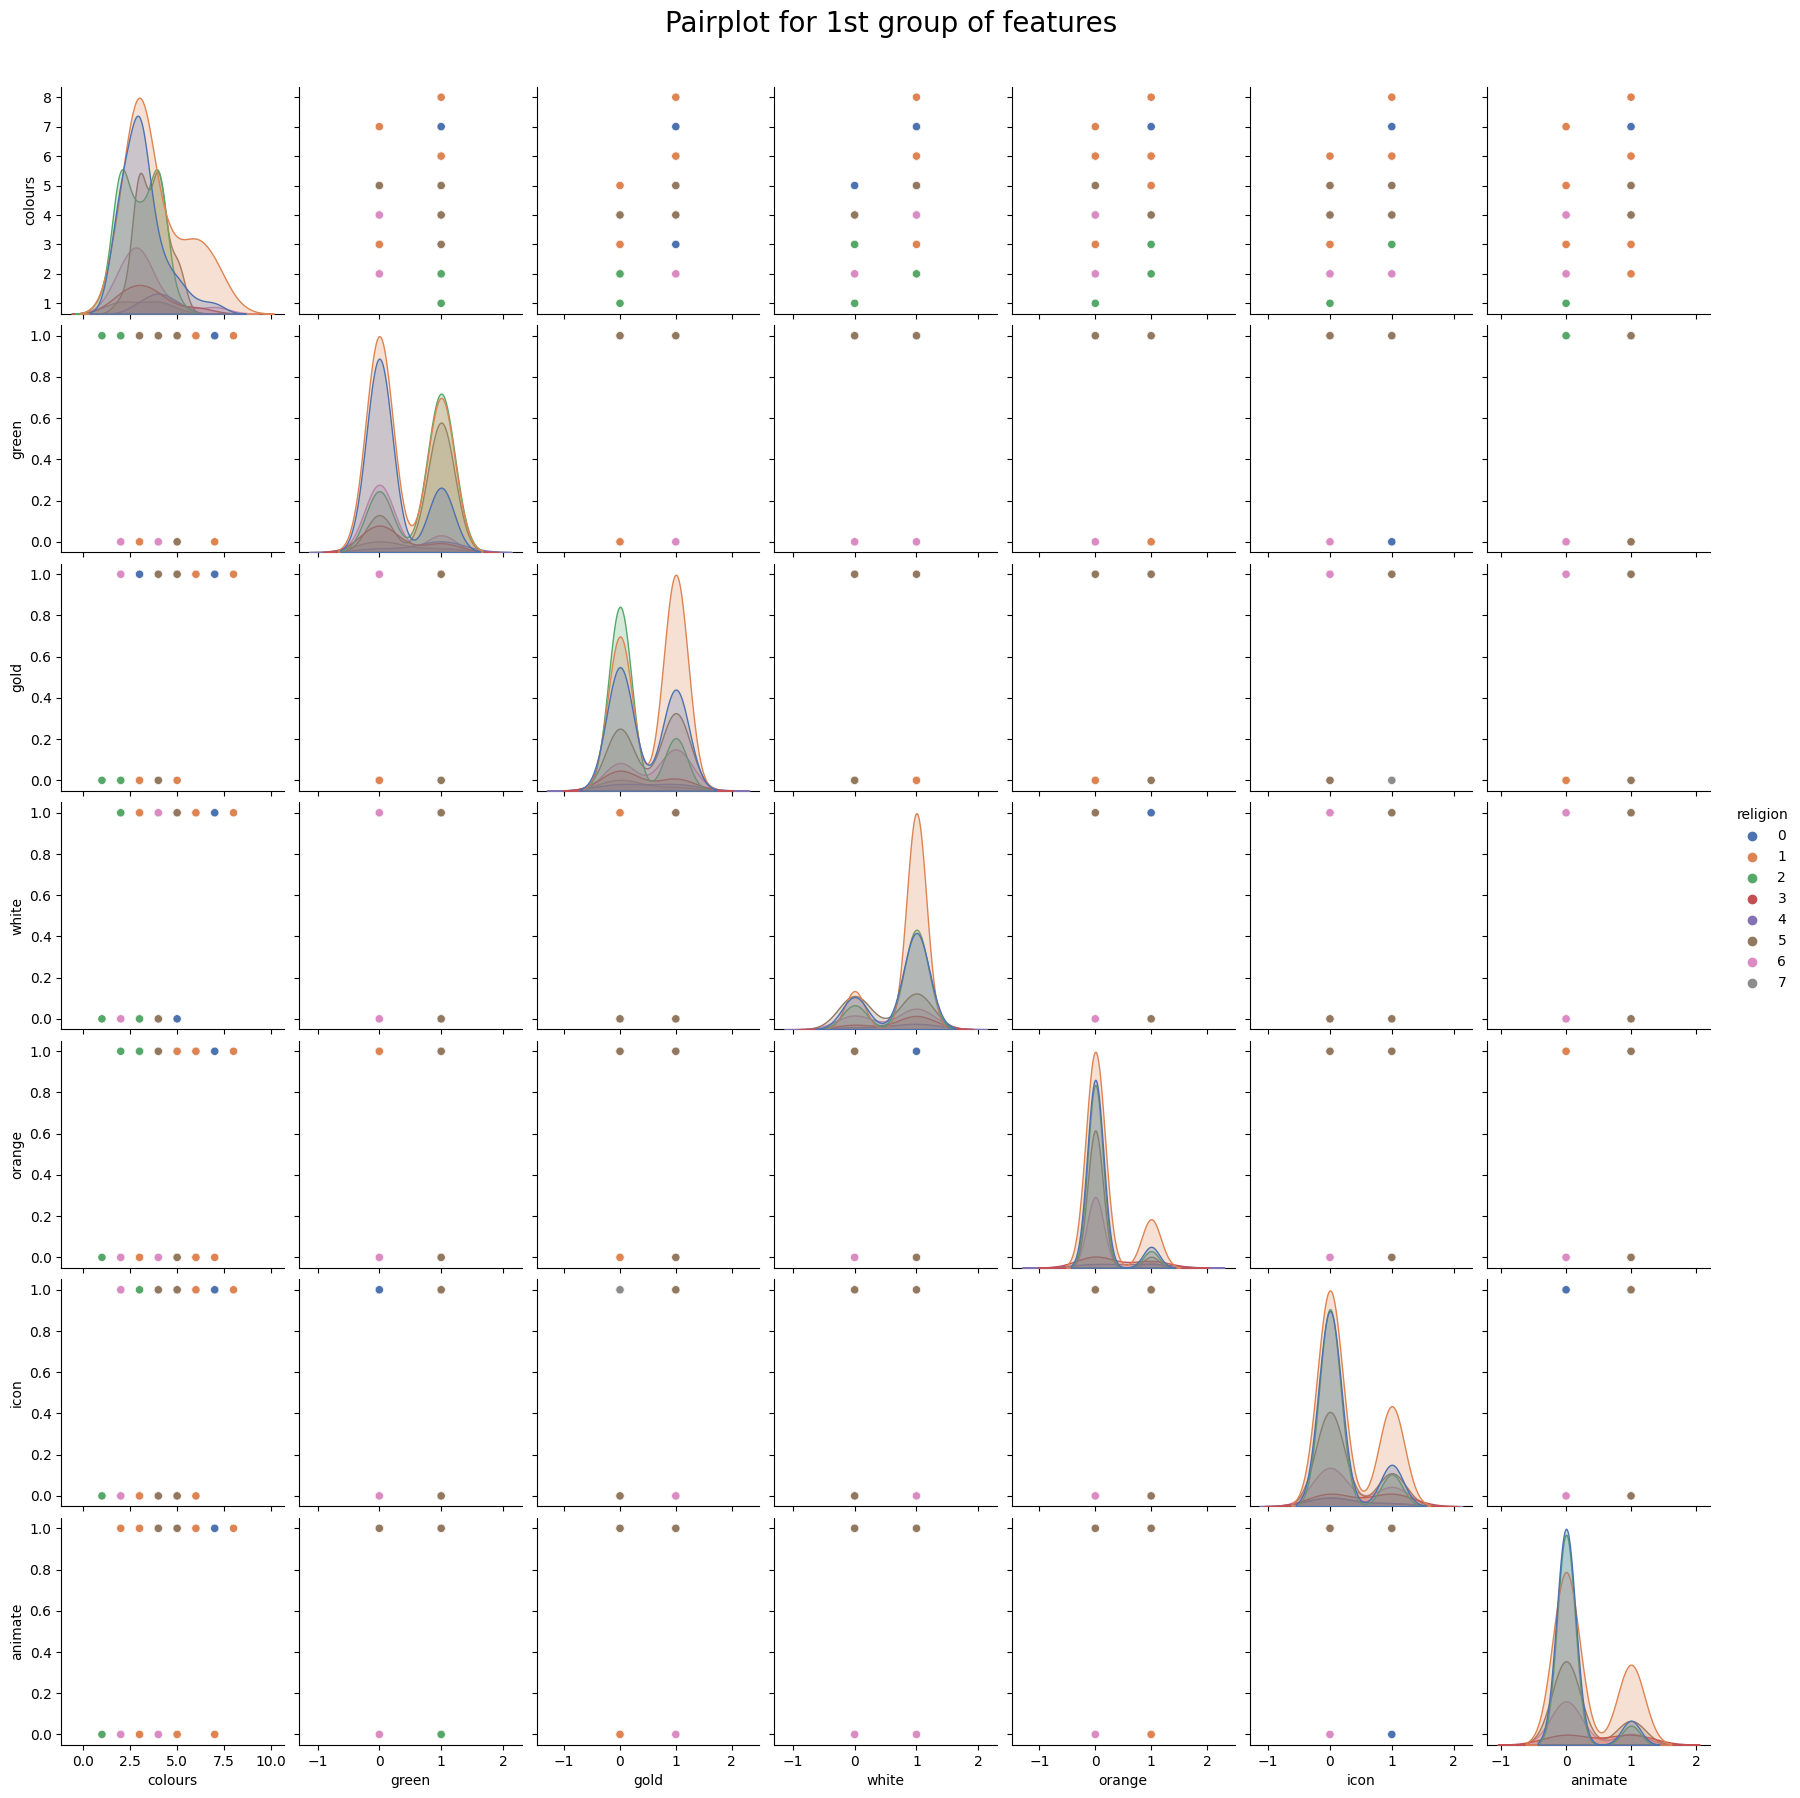

In [11]:
sns.pairplot(flags.iloc[:,6:], vars=['colours', 'green', 'gold', 'white', 'orange', 'icon', 'animate'], hue='religion', palette='deep')
plt.suptitle('Pairplot for 1st group of features', y=1.03, size=20)
plt.show()

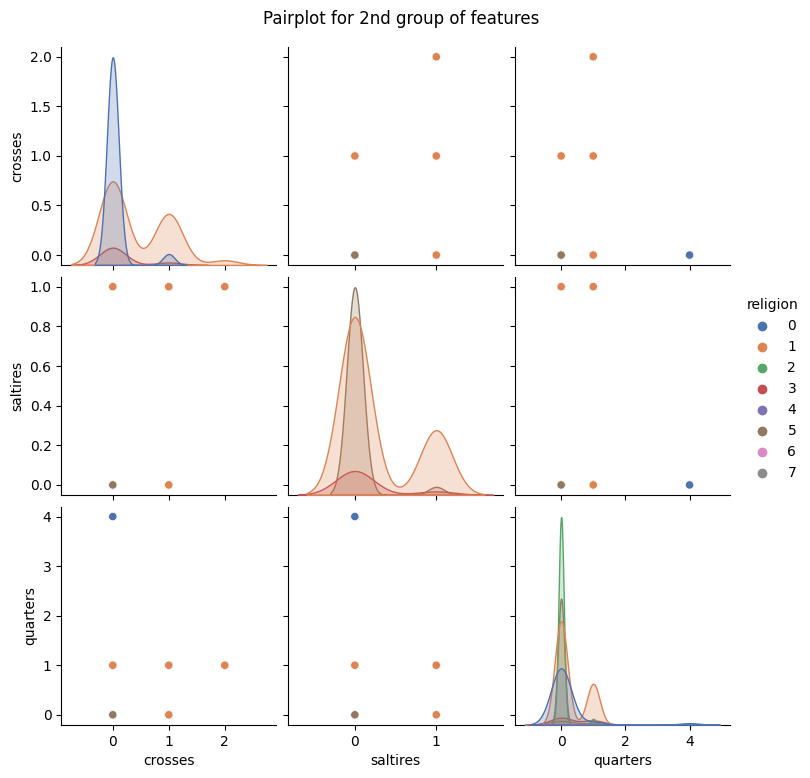

In [12]:
sns.pairplot(flags.iloc[:,6:], vars=['crosses', 'saltires', 'quarters'], hue='religion', palette='deep')
plt.suptitle('Pairplot for 2nd group of features', y=1.03)
plt.show()

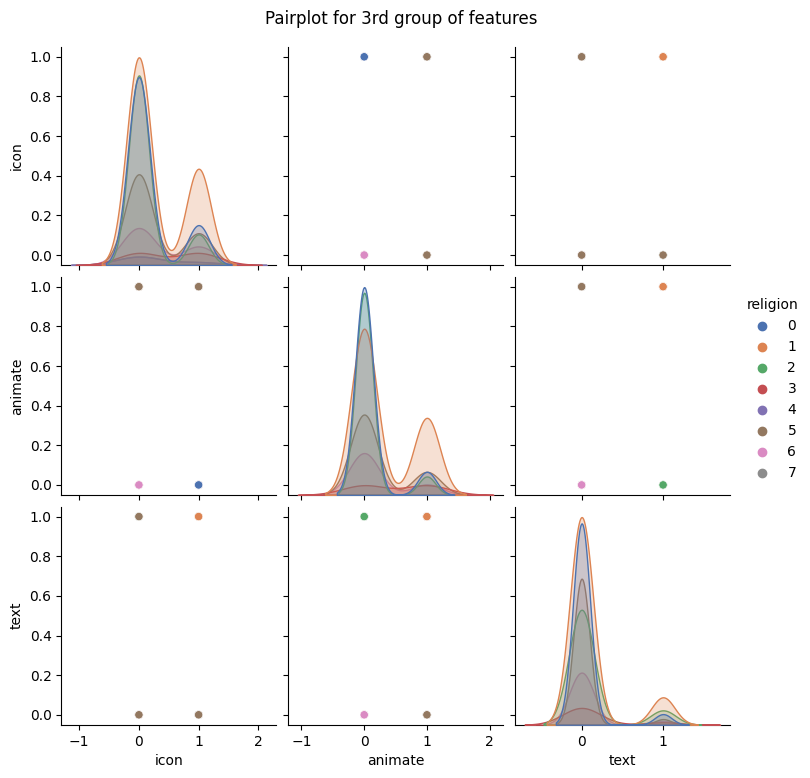

In [13]:
sns.pairplot(flags.iloc[:,6:], vars=['icon', 'animate', 'text'], hue='religion', palette='deep')
plt.suptitle('Pairplot for 3rd group of features', y=1.03)
plt.show()

As we can see, these features may correlate with each other, but they also allow us to strongly identify some categories by them, so dropping them is not the best solution in our situation.  

Let's assemble the pipeline for transformations and model training, and the first step is to choose an encoder for the data, as our dataset is predominantly categorical features. We will use a library (category_encoders) that supports many different encoders. 

For generating new features we will use whis types of encoders:
- [Count Encoder](https://contrib.scikit-learn.org/category_encoders/count.html)
- [OneHot Encoder](https://contrib.scikit-learn.org/category_encoders/onehot.html)
- [Binary Encoder](https://contrib.scikit-learn.org/category_encoders/binary.html)
- [Helmert Encoder](https://contrib.scikit-learn.org/category_encoders/helmert.html)

In [14]:
# initialize all encoders
count_enc = CountEncoder()
oh_enc = OneHotEncoder()
bin_enc = BinaryEncoder(drop_invariant=True)
helm_enc = HelmertEncoder(drop_invariant=True)

Also, since we have many boolean features, using polynomial features will give additional indicators of 2 or 3 features (depending on the degree) in the aggregate or they will minimize influence of numerical features.

Initialize `score_dataset` function for evaluation type of encoder using cross validation with 5 folds.

In [15]:
def score_dataset(X, y, estimator=RandomForestClassifier(random_state=0)):
    score_f1 = cross_val_score(
        estimator, X, y, cv=5, scoring="f1_weighted"
    )
    score_pre = cross_val_score(
        estimator, X, y, cv=5, scoring=make_scorer(precision_score, average='weighted')
    )
    score_re = cross_val_score(
        estimator, X, y, cv=5, scoring=make_scorer(recall_score, average='weighted')
    )
    score_ac = cross_val_score(
        estimator, X, y, cv=5, scoring="accuracy"
    )
    return score_ac.mean(), score_pre.mean(), score_re.mean(), score_f1.mean()

In [17]:
sc = score_dataset(X[num],y)
print(f"Baseline: accuracy score: {sc[0]:.5f}, precision score: {sc[1]:.5f}, recall score: {sc[2]:.5f}, F1 score: {sc[3]:.5f}")


Baseline: accuracy score: 0.43833, precision score: 0.42667, recall score: 0.43833, F1 score: 0.41528


In [125]:
encoders = [count_enc, helm_enc, oh_enc, bin_enc]
encoders_names = ['Count Encoder', 'Helmert Encoder', 'OneHot Encoder', 'Binary Encoder']
for i, encoder in enumerate(encoders):
    transformer = ColumnTransformer(transformers=[('cat', encoder, cat)], 
                                    remainder='passthrough')
    pipeline = Pipeline(steps=[('transformer', transformer), 
                               ('classificator', RandomForestClassifier(random_state=0))])
    sc = score_dataset(X, y, estimator=pipeline)
    print(f"{encoders_names[i]}: accuracy score: {sc[0]:.5f}, precision score: {sc[1]:.5f}, recall score: {sc[2]:.5f}, F1 score: {sc[3]:.5f}")
    

Count Encoder: accuracy score: 0.45870, precision score: 0.43645, recall score: 0.45870, F1 score: 0.43044
Helmert Encoder: accuracy score: 0.45870, precision score: 0.43706, recall score: 0.45870, F1 score: 0.43093
OneHot Encoder: accuracy score: 0.43266, precision score: 0.40204, recall score: 0.43266, F1 score: 0.39955
Binary Encoder: accuracy score: 0.44845, precision score: 0.44935, recall score: 0.44845, F1 score: 0.42328


As we can see, the best processing results were obtained by Helmert Encoder. Upgrade our pipeline by any variant of features.

In [132]:
for i in range(2,5):
    transformer = ColumnTransformer(transformers=[('cat', helm_enc, cat)], 
                                    remainder='passthrough')
    pipeline = Pipeline(steps=[('transformer', transformer), 
                               ('poly', PolynomialFeatures(degree=i,include_bias=False)),
                               ('classificator', RandomForestClassifier(random_state=0))])
    # X1 = transformer.fit_transform(X)
    # score_dataset(X, y, estimator=pipeline)
    sc = score_dataset(X, y, estimator=pipeline)
    print(f"Degree of PolyFeatures is {i}, scores: accuracy: {sc[0]:.5f}, precision: {sc[1]:.5f}, recall: {sc[2]:.5f}, F1: {sc[3]:.5f}")
    

Degree of PolyFeatures is 2, scores: accuracy: 0.42794, precision: 0.41918, recall: 0.42794, F1: 0.40256
Degree of PolyFeatures is 3, scores: accuracy: 0.44318, precision: 0.41396, recall: 0.44318, F1: 0.41102
Degree of PolyFeatures is 4, scores: accuracy: 0.42281, precision: 0.38242, recall: 0.42281, F1: 0.38592


Let's try leaving degree is 3 and use PCA

In [167]:
for i in range(1,11):
    n=i*10
    transformer = ColumnTransformer(transformers=[('cat', helm_enc, cat)], 
                                    remainder='passthrough')
    pipeline = Pipeline(steps=[('transformer', transformer), 
                               ('poly', PolynomialFeatures(degree=3,include_bias=False)),
                               ('PCA', PCA(n_components=n, random_state=0)),
                               ('classificator', RandomForestClassifier(random_state=0))])
    # X1 = transformer.fit_transform(X)
    # score_dataset(X, y, estimator=pipeline)
    sc = score_dataset(X, y, estimator=pipeline)
    print(f"Features after PCA - {n}, scores: accuracy: {sc[0]:.5f}, precision: {sc[1]:.5f}, recall: {sc[2]:.5f}, F1: {sc[3]:.5f}")
    

Features after PCA - 10, scores: accuracy: 0.42200, precision: 0.39358, recall: 0.42200, F1: 0.39458
Features after PCA - 20, scores: accuracy: 0.45317, precision: 0.40972, recall: 0.45317, F1: 0.41474
Features after PCA - 30, scores: accuracy: 0.42227, precision: 0.39686, recall: 0.42227, F1: 0.39332
Features after PCA - 40, scores: accuracy: 0.41201, precision: 0.37705, recall: 0.41201, F1: 0.38113
Features after PCA - 50, scores: accuracy: 0.42254, precision: 0.38654, recall: 0.42254, F1: 0.38860
Features after PCA - 60, scores: accuracy: 0.41714, precision: 0.40520, recall: 0.41714, F1: 0.38229
Features after PCA - 70, scores: accuracy: 0.42267, precision: 0.43368, recall: 0.42267, F1: 0.38944
Features after PCA - 80, scores: accuracy: 0.40148, precision: 0.37175, recall: 0.40148, F1: 0.36411
Features after PCA - 90, scores: accuracy: 0.41242, precision: 0.40228, recall: 0.41242, F1: 0.37447
Features after PCA - 100, scores: accuracy: 0.41714, precision: 0.37663, recall: 0.41714, F

We get the highest scores by leaving 20 features at the expense of the PCA

# GridSearchCV
Let's carry out a hyperparameter selection on a finer grid around the selected parameters. Let us compare the results of the selected parameters for different classifiers: RandomForestClassifier, GradientBoostingClassifier, Gaussian Naive Bayes, KNeighborsClassifier and XGBClassifier.

In [18]:
transformer = ColumnTransformer(transformers=[('cat', helm_enc, cat)], 
                                    remainder='passthrough')
pipeline = Pipeline(steps=[('transformer', transformer), 
                           ('poly', PolynomialFeatures(include_bias=False)),
                           ('PCA', PCA(random_state=0)),
                           ('classificator', RandomForestClassifier(random_state=0))])

clf_rfc = GridSearchCV(estimator=pipeline,
                   param_grid={'poly__degree': [2, 3, 4], 
                               'PCA__n_components': [10, 15, 20, 25, 30],
                               'classificator__n_estimators': [100, 150, 200, 300],
                               'classificator__max_depth': [3, 5, 7, 9],
                               'classificator__min_samples_leaf': [1, 2, 3]
                              }, 
                   scoring='f1_weighted', 
                   cv=5)
clf_rfc.fit(X, y)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('transformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('cat',
                                                                         HelmertEncoder(drop_invariant=True),
                                                                         ['red',
                                                                          'green',
                                                                          'blue',
                                                                          'gold',
                                                                          'white',
                                                                          'black',
                                                                          'orange',
                                                                          'mainhue',
                                                                          'crescent',
                                                                          'triangle',
                                                                          'icon',
                                                                          'animate',
                                                                          'text',
                                                                          'topleft',
                                                                          'botright'])])),
                                       ('poly',
                                        PolynomialFeatures(include_bias=False)),
                                       ('PCA', PCA(random_state=0)),
                                       ('classificator',
                                        RandomForestClassifier(random_state=0))]),
             param_grid={'PCA__n_components': [10, 15, 20, 25, 30],
                         'classificator__max_depth': [3, 5, 7, 9],
                         'classificator__min_samples_leaf': [1, 2, 3],
                         'classificator__n_estimators': [100, 150, 200, 300],
                         'poly__degree': [2, 3, 4]},
             scoring='f1_weighted')

In [24]:
clf_rfc.best_score_, clf_rfc.best_params_

(0.4252850751453291,
 {'PCA__n_components': 25,
  'classificator__max_depth': 5,
  'classificator__min_samples_leaf': 2,
  'classificator__n_estimators': 200,
  'poly__degree': 2})

In [47]:
sc_clf_rfc = score_dataset(X, y, estimator=clf_rfc.best_estimator_)
print(f"Pipeline - 'clf_rfc', scores: accuracy: {sc_clf_rfc[0]:.5f}, precision: {sc_clf_rfc[1]:.5f}, recall: {sc_clf_rfc[2]:.5f}, F1: {sc_clf_rfc[3]:.5f}")

Pipeline - 'clf_rfc', scores: accuracy: 0.47422, precision: 0.42665, recall: 0.47422, F1: 0.42529


In [43]:
transformer = ColumnTransformer(transformers=[('cat', helm_enc, cat)], 
                                    remainder='passthrough')
pipeline = Pipeline(steps=[('transformer', transformer), 
                           ('poly', PolynomialFeatures(include_bias=False)),
                           ('PCA', PCA(random_state=0)),
                           ('classificator', GradientBoostingClassifier(random_state=0))])

clf_gbc = GridSearchCV(estimator=pipeline,
                   param_grid={'poly__degree': [2, 3, 4], 
                               'PCA__n_components': [10, 15, 20, 25, 30],
                               'classificator__learning_rate': [0.001, 0.01, 0.1],
                               'classificator__n_estimators': [100, 150, 200, 300],
                               'classificator__max_depth': [3, 5, 7, 9]
                              }, 
                   scoring='f1_weighted', 
                   cv=5)
clf_gbc.fit(X, y)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('transformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('cat',
                                                                         HelmertEncoder(drop_invariant=True),
                                                                         ['red',
                                                                          'green',
                                                                          'blue',
                                                                          'gold',
                                                                          'white',
                                                                          'black',
                                                                          'orange',
                                                                          'mainhue',
                                                                          'crescent',
                                                                          'triangle',
                                                                          'icon',
                                                                          'animate',
                                                                          'text',
                                                                          'topleft',
                                                                          'botright'])])),
                                       ('poly',
                                        PolynomialFeatures(include_bias=False)),
                                       ('PCA', PCA(random_state=0)),
                                       ('classificator',
                                        GradientBoostingClassifier(random_state=0))]),
             param_grid={'PCA__n_components': [10, 15, 20, 25, 30],
                         'classificator__learning_rate': [0.001, 0.01, 0.1],
                         'classificator__max_depth': [3, 5, 7, 9],
                         'classificator__n_estimators': [100, 150, 200, 300],
                         'poly__degree': [2, 3, 4]},
             scoring='f1_weighted')

In [44]:
clf_gbc.best_score_, clf_gbc.best_params_

(0.4142292671312521,
 {'PCA__n_components': 10,
  'classificator__learning_rate': 0.01,
  'classificator__max_depth': 3,
  'classificator__n_estimators': 200,
  'poly__degree': 2})

In [48]:
sc_clf_gbc = score_dataset(X, y, estimator=clf_gbc.best_estimator_)
print(f"Pipeline - 'clf_gbc', scores: accuracy: {sc_clf_gbc[0]:.5f}, precision: {sc_clf_gbc[1]:.5f}, recall: {sc_clf_gbc[2]:.5f}, F1: {sc_clf_gbc[3]:.5f}")

Pipeline - 'clf_gbc', scores: accuracy: 0.44332, precision: 0.42216, recall: 0.44332, F1: 0.41423


In [30]:
transformer = ColumnTransformer(transformers=[('cat', helm_enc, cat)], 
                                    remainder='passthrough')
pipeline = Pipeline(steps=[('transformer', transformer), 
                           ('poly', PolynomialFeatures(include_bias=False)),
                           ('PCA', PCA(random_state=0)),
                           ('classificator', GaussianNB())])

clf_gnb = GridSearchCV(estimator=pipeline,
                   param_grid={'poly__degree': [2, 3, 4], 
                               'PCA__n_components': [10, 15, 20, 25, 30],
                               'classificator__var_smoothing': [1e-11, 5e-11, 1e-10, 5e-10, 1e-9]
                              }, 
                   scoring='f1_weighted', 
                   cv=5)
clf_gnb.fit(X, y)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('transformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('cat',
                                                                         HelmertEncoder(drop_invariant=True),
                                                                         ['red',
                                                                          'green',
                                                                          'blue',
                                                                          'gold',
                                                                          'white',
                                                                          'black',
                                                                          'orange',
                                                                          'mainhue',
                                                                          'crescent',
                                                                          'triangle',
                                                                          'icon',
                                                                          'animate',
                                                                          'text',
                                                                          'topleft',
                                                                          'botright'])])),
                                       ('poly',
                                        PolynomialFeatures(include_bias=False)),
                                       ('PCA', PCA(random_state=0)),
                                       ('classificator', GaussianNB())]),
             param_grid={'PCA__n_components': [10, 15, 20, 25, 30],
                         'classificator__var_smoothing': [1e-11, 5e-11, 1e-10,
                                                          5e-10, 1e-09],
                         'poly__degree': [2, 3, 4]},
             scoring='f1_weighted')

In [31]:
clf_gnb.best_score_, clf_gnb.best_params_

(0.2501135549111258,
 {'PCA__n_components': 25,
  'classificator__var_smoothing': 1e-11,
  'poly__degree': 2})

In [49]:
sc_clf_gnb = score_dataset(X, y, estimator=clf_gnb.best_estimator_)
print(f"Pipeline - 'clf_gnb', scores: accuracy: {sc_clf_gnb[0]:.5f}, precision: {sc_clf_gnb[1]:.5f}, recall: {sc_clf_gnb[2]:.5f}, F1: {sc_clf_gnb[3]:.5f}")

Pipeline - 'clf_gnb', scores: accuracy: 0.24265, precision: 0.37096, recall: 0.24265, F1: 0.25011


In [34]:
transformer = ColumnTransformer(transformers=[('cat', helm_enc, cat)], 
                                    remainder='passthrough')
pipeline = Pipeline(steps=[('transformer', transformer), 
                           ('poly', PolynomialFeatures(include_bias=False)),
                           ('PCA', PCA(random_state=0)),
                           ('classificator', KNeighborsClassifier())])

clf_knc = GridSearchCV(estimator=pipeline,
                   param_grid={'poly__degree': [2, 3, 4], 
                               'PCA__n_components': [10, 15, 20, 25, 30],
                               'classificator__n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
                               'classificator__weights': ['uniform', 'distance'],
                               'classificator__algorithm': ['ball_tree', 'kd_tree', 'brute']
                              }, 
                   scoring='f1_weighted', 
                   cv=5)
clf_knc.fit(X, y)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('transformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('cat',
                                                                         HelmertEncoder(drop_invariant=True),
                                                                         ['red',
                                                                          'green',
                                                                          'blue',
                                                                          'gold',
                                                                          'white',
                                                                          'black',
                                                                          'orange',
                                                                          'mainhue',
                                                                          'crescent',
                                                                          'triangle',
                                                                          'icon',
                                                                          'animate',
                                                                          'text',
                                                                          'topleft',
                                                                          'botright'])])),
                                       ('poly',
                                        PolynomialFeatures(include_bias=False)),
                                       ('PCA', PCA(random_state=0)),
                                       ('classificator',
                                        KNeighborsClassifier())]),
             param_grid={'PCA__n_components': [10, 15, 20, 25, 30],
                         'classificator__algorithm': ['ball_tree', 'kd_tree',
                                                      'brute'],
                         'classificator__n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9,
                                                        10, 11, 12, 13, 14,
                                                        15],
                         'classificator__weights': ['uniform', 'distance'],
                         'poly__degree': [2, 3, 4]},
             scoring='f1_weighted')

In [35]:
clf_knc.best_score_, clf_knc.best_params_

(0.42198861280713074,
 {'PCA__n_components': 25,
  'classificator__algorithm': 'ball_tree',
  'classificator__n_neighbors': 8,
  'classificator__weights': 'distance',
  'poly__degree': 4})

In [50]:
sc_clf_knc = score_dataset(X, y, estimator=clf_knc.best_estimator_)
print(f"Pipeline - 'clf_knc', scores: accuracy: {sc_clf_knc[0]:.5f}, precision: {sc_clf_knc[1]:.5f}, recall: {sc_clf_knc[2]:.5f}, F1: {sc_clf_knc[3]:.5f}")

Pipeline - 'clf_knc', scores: accuracy: 0.45385, precision: 0.42294, recall: 0.45385, F1: 0.42199


In [39]:
transformer = ColumnTransformer(transformers=[('cat', helm_enc, cat)], 
                                    remainder='passthrough')
pipeline = Pipeline(steps=[('transformer', transformer), 
                           ('poly', PolynomialFeatures(include_bias=False)),
                           ('PCA', PCA(random_state=0)),
                           ('classificator', xgb.XGBClassifier(random_state=0))])

clf_xgb = GridSearchCV(estimator=pipeline,
                   param_grid={'poly__degree': [2, 3, 4], 
                               'PCA__n_components': [15, 20, 25, 30, 35],
                               'classificator__learning_rate': [0.001, 0.01, 0.1],
                               'classificator__max_depth': [2, 3, 4, 5],
                               'classificator__min_child_weight': [1, 2, 3, 4],
                               'classificator__colsample_bytree': [0.6, 0.8, 1.0],
                               'classificator__subsample': [0.6, 0.8, 1.0]
                              }, 
                   scoring='f1_weighted', 
                   cv=5)
clf_xgb.fit(X, y)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('transformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('cat',
                                                                         HelmertEncoder(drop_invariant=True),
                                                                         ['red',
                                                                          'green',
                                                                          'blue',
                                                                          'gold',
                                                                          'white',
                                                                          'black',
                                                                          'orange',
                                                                          'mainhue',
                                                                          'crescent',
                                                                          'triangle',
                                                                          'icon',
                                                                          'animate',
                                                                          'text',
                                                                          'topleft',
                                                                          'botright'])])),
                                       ('poly',
                                        PolynomialFeatures(include_bias=False)),
                                       ('PCA', P...
                                                      reg_alpha=None,
                                                      reg_lambda=None, ...))]),
             param_grid={'PCA__n_components': [15, 20, 25, 30, 35],
                         'classificator__colsample_bytree': [0.6, 0.8, 1.0],
                         'classificator__learning_rate': [0.001, 0.01, 0.1],
                         'classificator__max_depth': [2, 3, 4, 5],
                         'classificator__min_child_weight': [1, 2, 3, 4],
                         'classificator__subsample': [0.6, 0.8, 1.0],
                         'poly__degree': [2, 3, 4]},
             scoring='f1_weighted')

In [40]:
clf_xgb.best_score_, clf_xgb.best_params_

(0.44829535213782623,
 {'PCA__n_components': 15,
  'classificator__colsample_bytree': 0.8,
  'classificator__learning_rate': 0.01,
  'classificator__max_depth': 4,
  'classificator__min_child_weight': 3,
  'classificator__subsample': 1.0,
  'poly__degree': 2})

In [51]:
sc_clf_xgb = score_dataset(X, y, estimator=clf_xgb.best_estimator_)
print(f"Pipeline - 'clf_xgb', scores: accuracy: {sc_clf_xgb[0]:.5f}, precision: {sc_clf_xgb[1]:.5f}, recall: {sc_clf_xgb[2]:.5f}, F1: {sc_clf_xgb[3]:.5f}")

Pipeline - 'clf_xgb', scores: accuracy: 0.49460, precision: 0.44642, recall: 0.49460, F1: 0.44830


Let's try using stacking for the top four models and see the result

In [54]:
estimators = [('forest', clf_rfc.best_estimator_), 
              ('gradboost', clf_gbc.best_estimator_),
              ('kneighbors', clf_knc.best_estimator_),
              ('xgboost', clf_xgb.best_estimator_)
             ]
stack = StackingClassifier(estimators=estimators, 
                           final_estimator=LogisticRegression(),)
sc_stack = score_dataset(X, y, estimator=stack)
print(f"Stacking Classifier, scores: accuracy: {sc_stack[0]:.5f}, precision: {sc_stack[1]:.5f}, recall: {sc_stack[2]:.5f}, F1: {sc_stack[3]:.5f}")


Stacking Classifier, scores: accuracy: 0.44332, precision: 0.31178, recall: 0.44332, F1: 0.35663


# Results
In our project we will consider that it is not the accuracy in general that is important, but the accuracy in determining the affiliation of each religion. Given the obvious imbalance in the target classes, we will use weighted values of precision, recall and f1-score.

|Model|Settings|Data preparation|Accuracy|Presicion|Recall|F1-score|
|-----|-----|-----|-----|-----|-----|-----|
|Logistic Regression|Default|None|0.41|0.51|0.33|0.35|
|Random Forest|Default|None|0.54|0.51|0.54|0.50|
|Random Forest|CV|Helmert Encoder|0.45870|0.43706|0.45870|0.43093|
|Random Forest|CV|Helmert Encoder, Polynom:3|0.44318|0.41396|0.44318|0.41102|
|Random Forest|CV|Helmert Encoder, Polynom:3, PCA:20|0.45317|0.40972|0.45317|0.41474|
|Random Forest|CV, n_estimators:200, min_samples_leaf:2, max_depth:5|Helmert Encoder, Polynom:2, PCA:25|0.47422|0.42665|0.47422|0.42529|
|Gradient Boosting|CV, n_estimators:200, learning_rate:0.01, max_depth:3|Helmert Encoder, Polynom:2, PCA:10|0.44332|0.42216|0.44332|0.41423|
|Gaussian Naive Bayes|CV, var_smoothing:1e-11|Helmert Encoder, Polynom:2, PCA:25|0.24265|0.37096|0.24265|0.25011|
|KNeighbors|CV, algorithm:'ball_tree', n_neighbors:8, weights:'distance'|Helmert Encoder, Polynom:4, PCA:25|0.45385|0.42294|0.45385|0.42199|
|XGB|CV, colsample_bytree:0.8, learning_rate:0.01, max_depth:4, min_child_weight:3, subsample:1.0|Helmert Encoder, Polynom:2, PCA:15|0.49460|0.44642|0.49460|0.44830|
|Stacking|Stacking of Random Forest, Gradient Boosting, KNeighbors and XGBoost classifiers with Logistic Regression as a final estimator|Helmert Encoder, Polynom:2-4, PCA:10-25|0.44332|0.31178|0.44332|0.35663|

As we can see, stacking has not improved accuracy, but this is most likely because this model has become too complex for the data available, so it simply «memorises» the entire dataset, so in our situation the best performer is XGBoostingClassifier with F-score: 0.44830